In [97]:
import pandas as pd

# Load your dataset
auto = pd.read_csv('adverts.csv')

In [98]:
# Calculate the average price of each car make

costs = []
models = auto['standard_make'].unique()
for model in models:
    costs.append((model, int(auto.loc[auto["standard_make"]==model]["price"].mean())))
costs = pd.DataFrame(costs, columns=["standard_make", "cost"])

In [99]:
# Count the number of entries for each car make

make_counts = auto['standard_make'].value_counts(sort=True)
make_counts = pd.DataFrame({'standard_make':make_counts.index, 'count':make_counts.values})

In [100]:
# Combine the make counts and average price

# Ensure both frames are indexed by the make
make_counts = make_counts.set_index('standard_make')
costs = costs.set_index('standard_make')

combined = pd.concat([make_counts, costs], axis=1) # Combine the frames as columns

combined = combined.reset_index() # Set standard_make to column rather than index

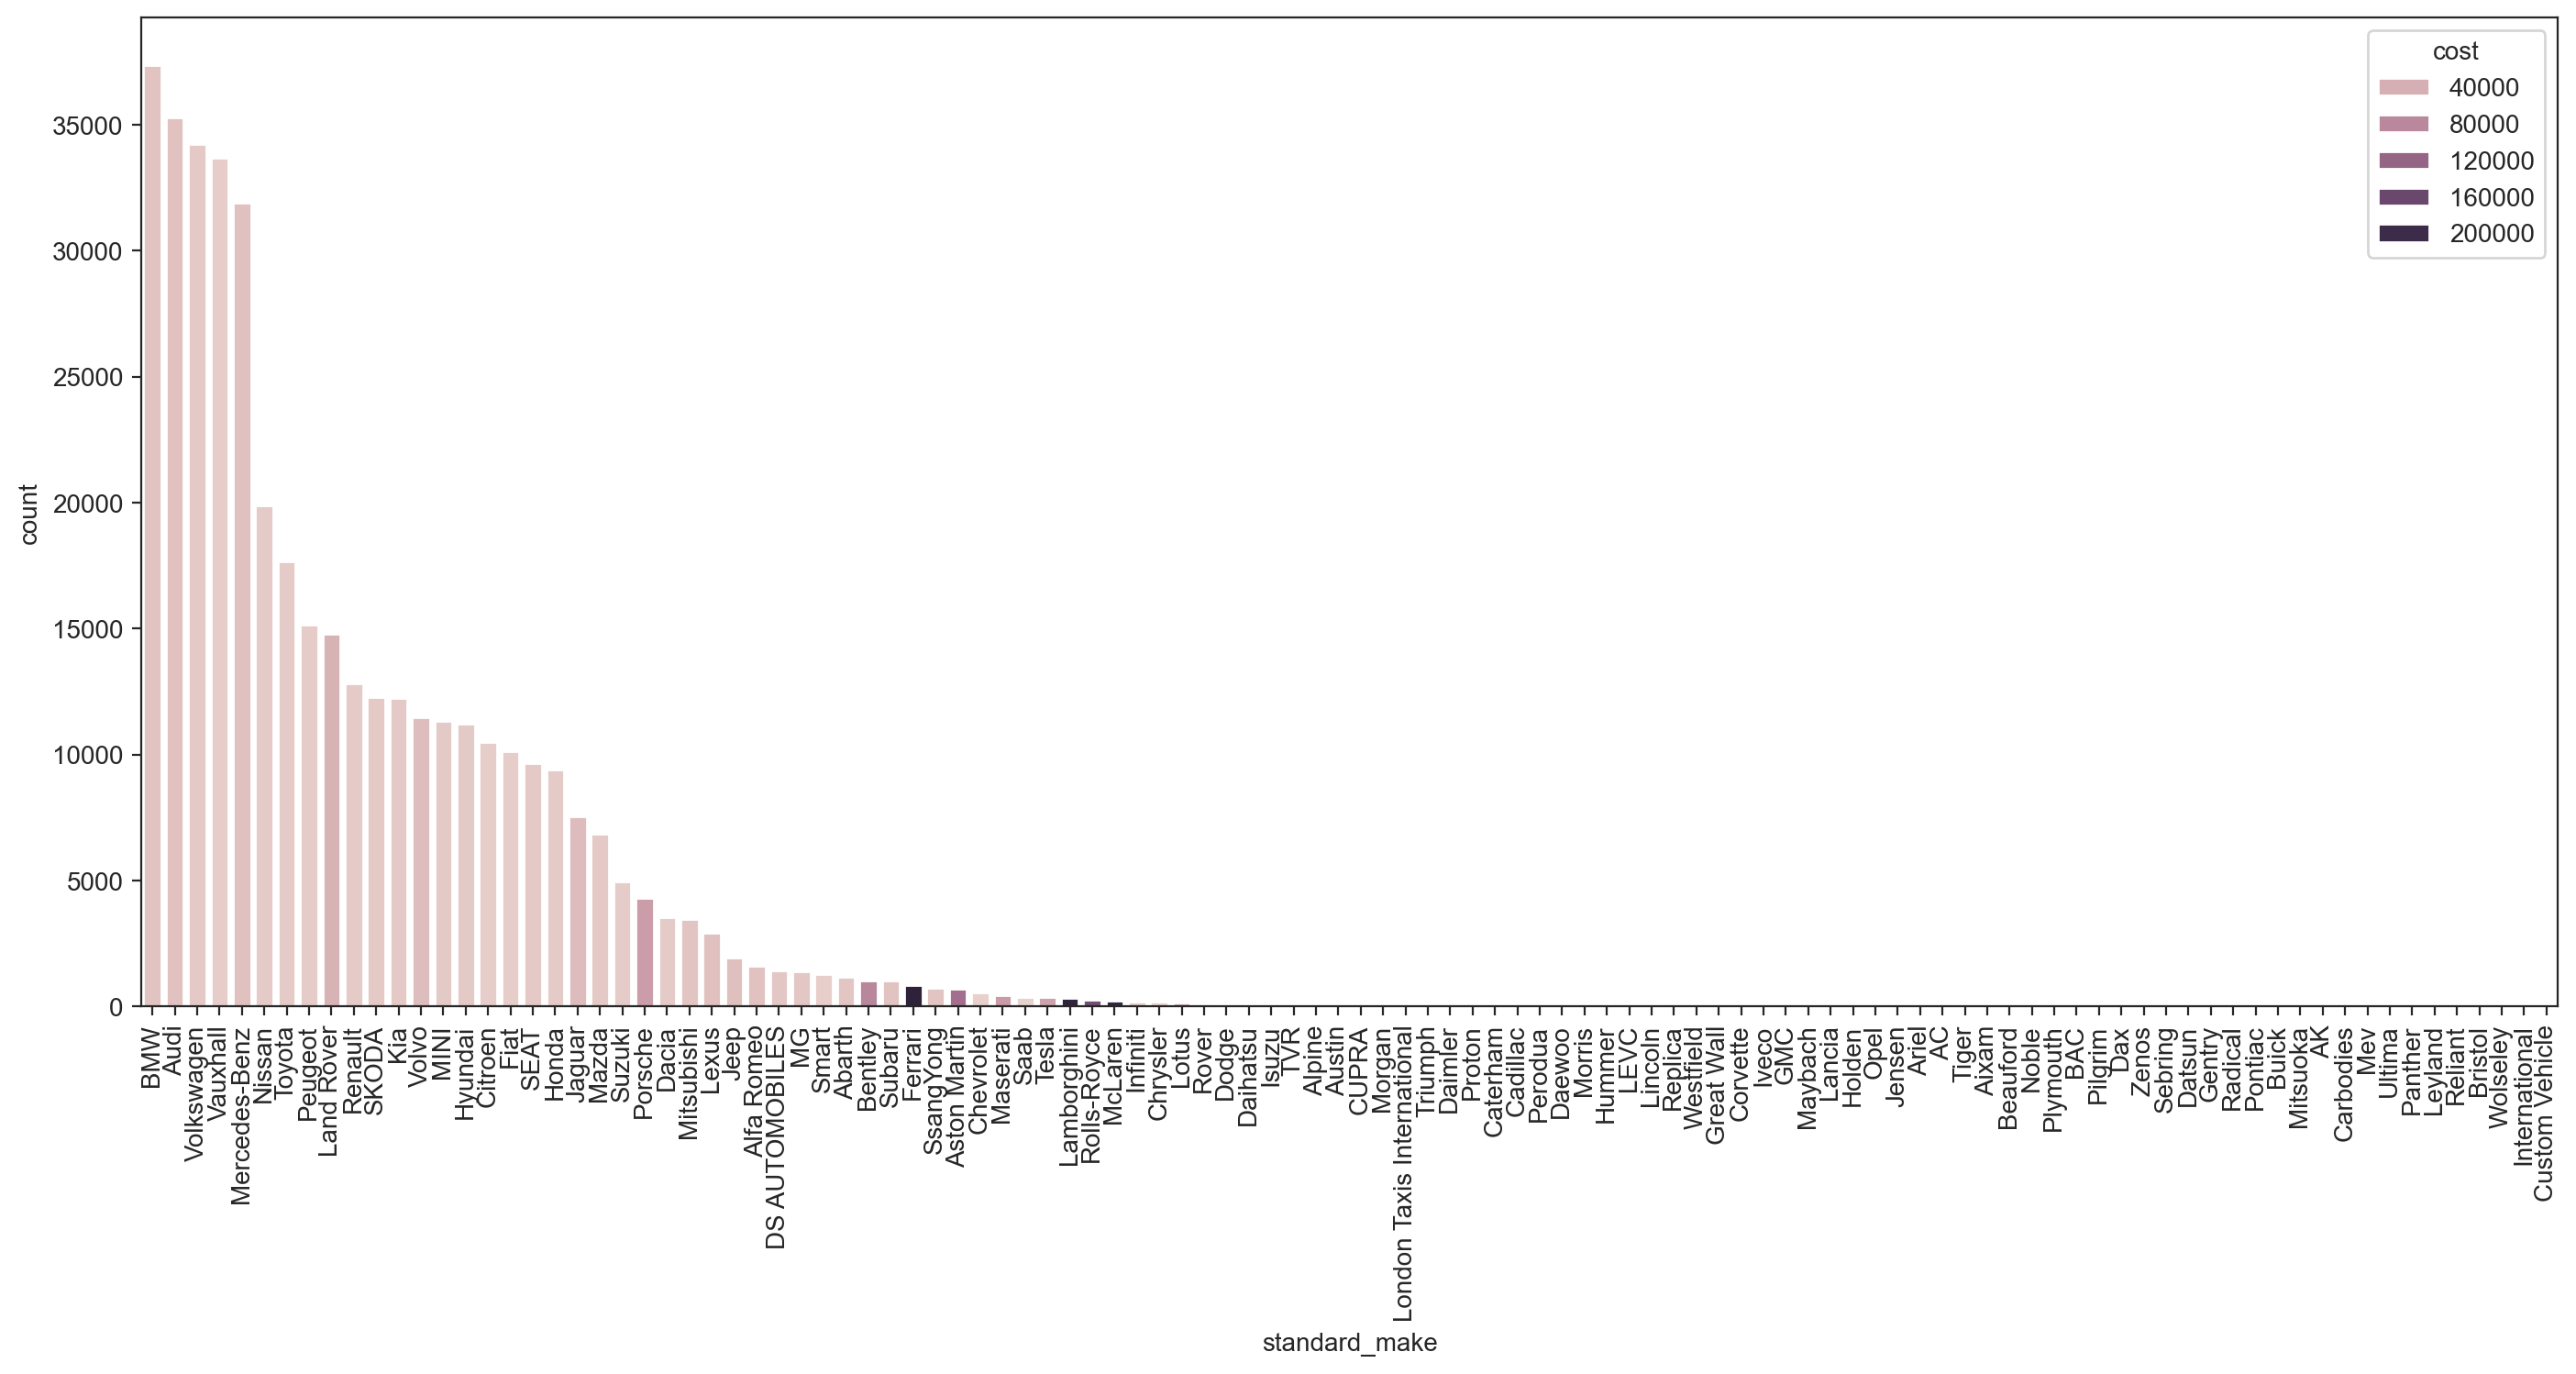

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


combined = combined.loc[combined["standard_make"]!="Bugatti"]
combined = combined.loc[combined["standard_make"]!="Pagani"]

sns.barplot(combined, y="count", x="standard_make", hue="cost")
plt.xticks(rotation=90)
plt.show()

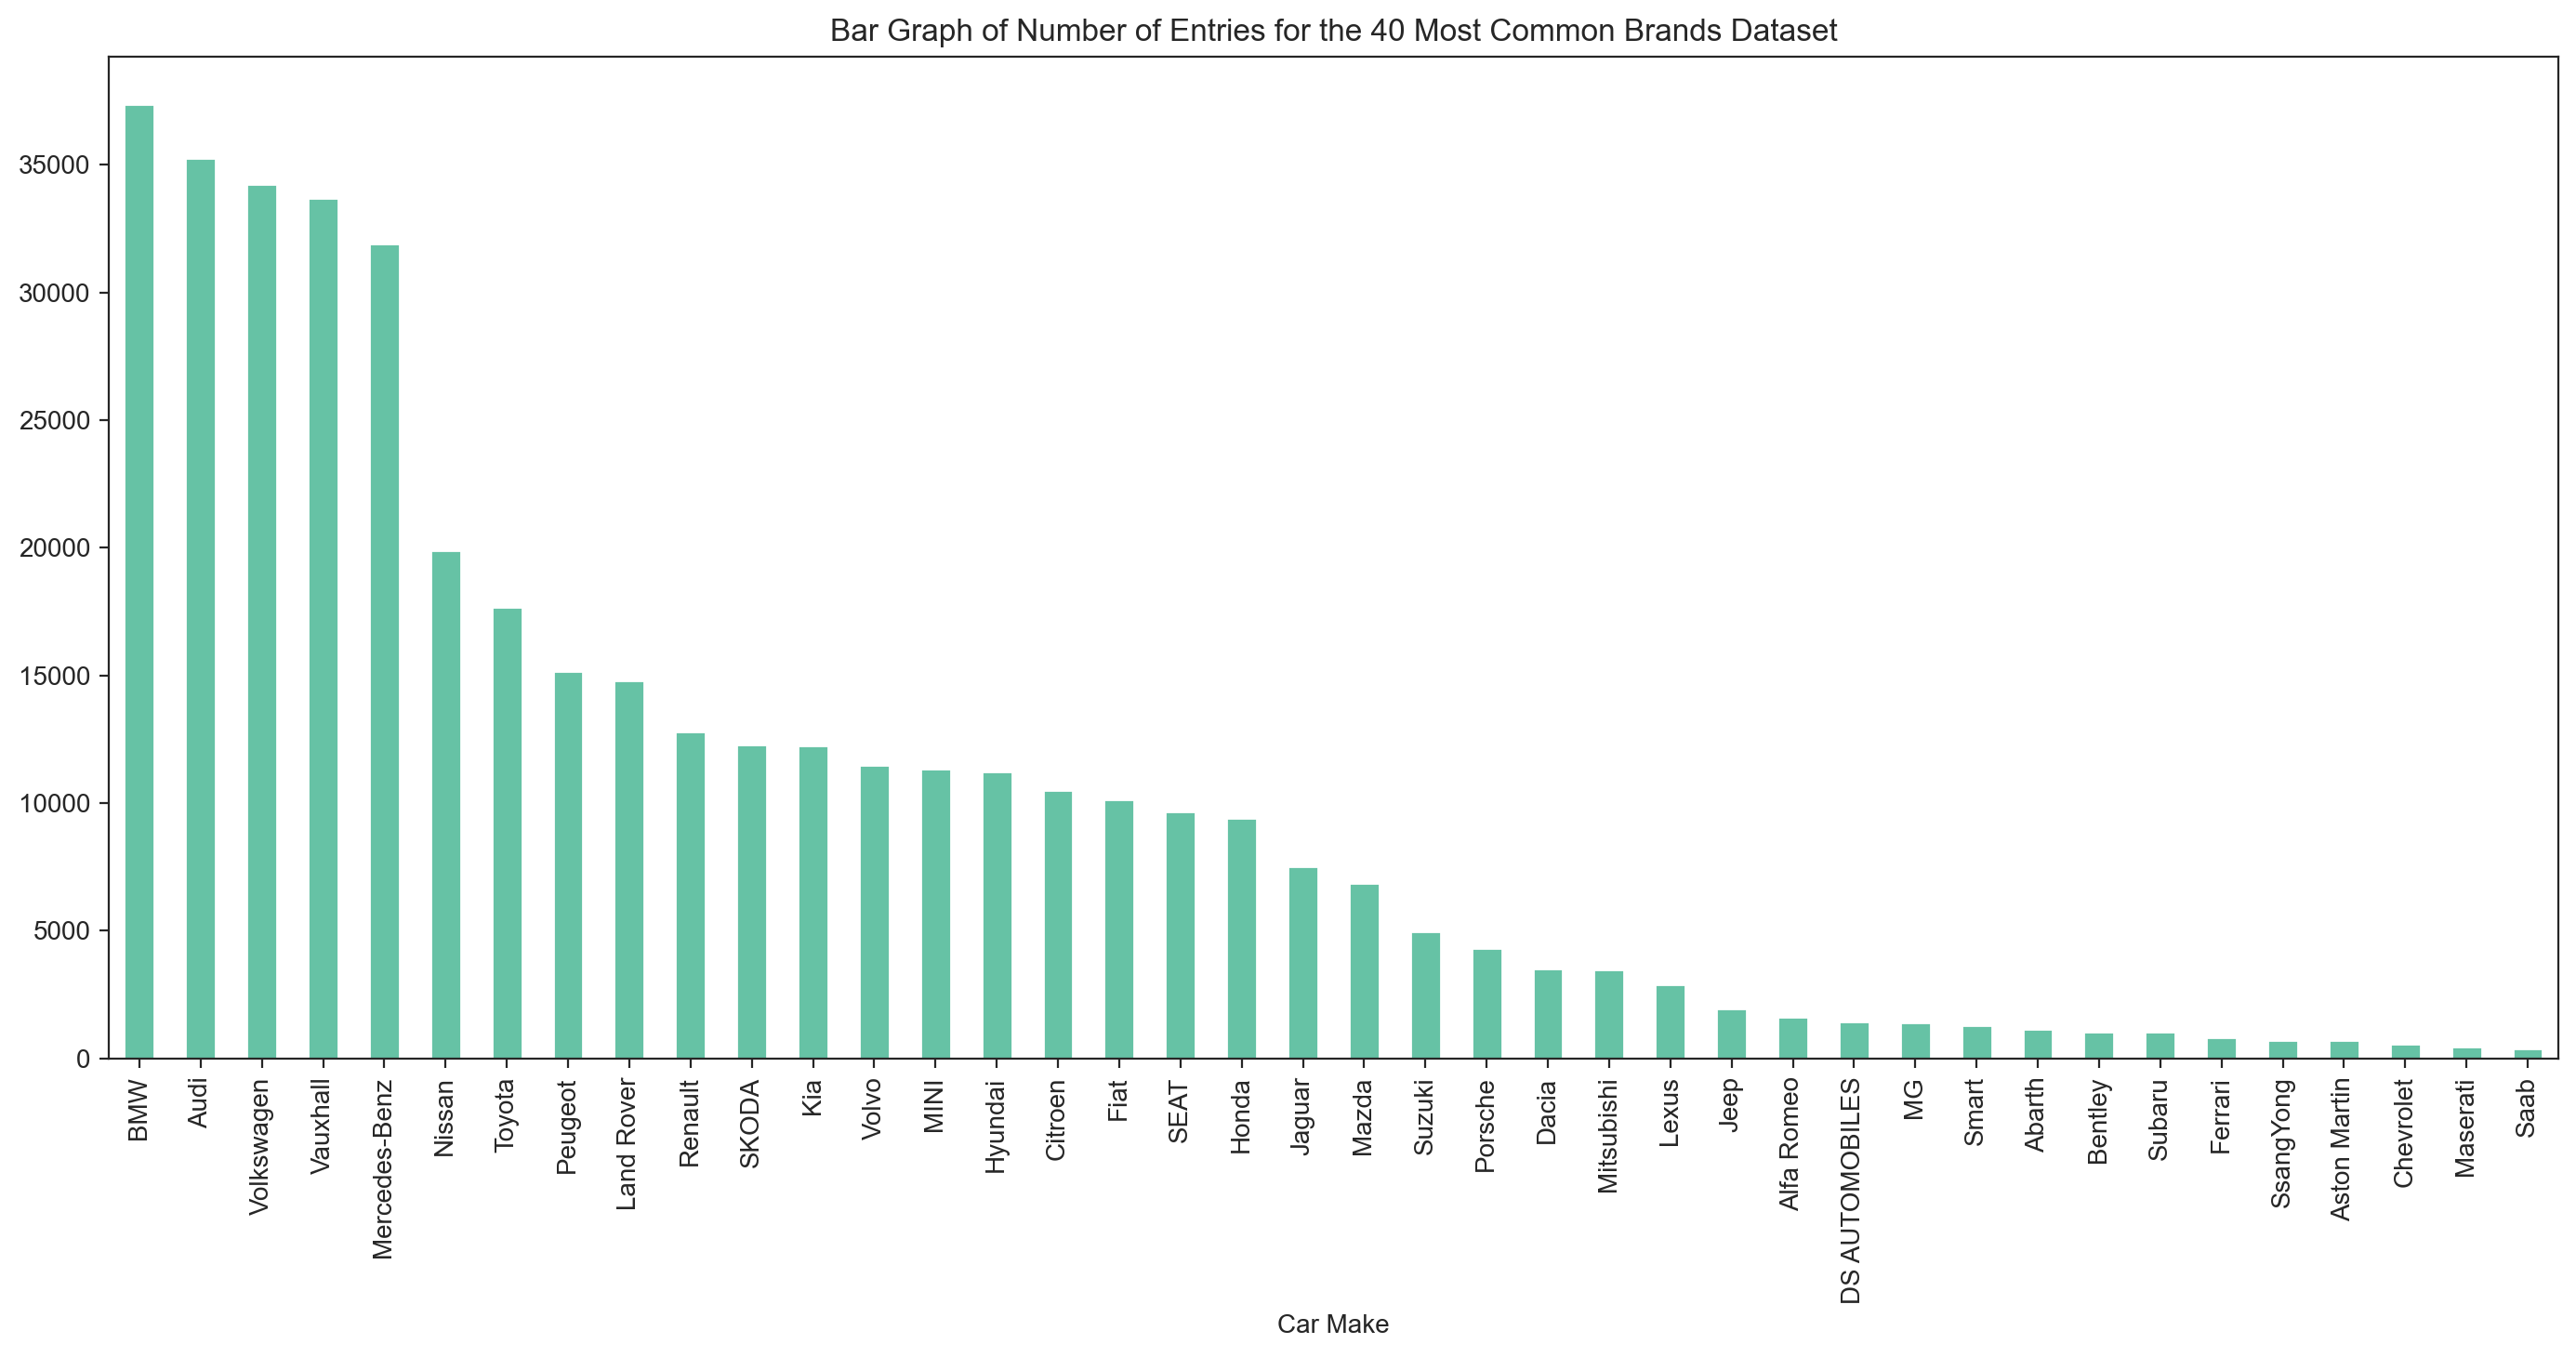

In [102]:
axes = auto['standard_make'].value_counts(sort=True)[:40].plot.bar()
axes.set_title("Bar Graph of Number of Entries for the 40 Most Common Brands Dataset");
axes.set_xlabel("Car Make");

In [103]:
# Drop all expensive makes

print("Dropping makes", auto.loc[auto["price"]>1e6]["standard_make"].unique())
spenny_makes = auto.loc[auto["price"]>1e6]["standard_make"].unique()
for make in spenny_makes:
    auto = auto.loc[auto["standard_make"]!=make]

Dropping makes ['Bugatti' 'Porsche' 'McLaren' 'Ferrari' 'Pagani' 'Maserati'
 'Aston Martin' 'Lamborghini']


In [104]:
# Drop any weird/annoying values

def map_to_int(str_list):
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict

# auto = auto.loc[auto["price"]<1e5]
auto = auto.drop(columns=["standard_colour", "standard_model", "public_reference"])
auto = auto.dropna()

# Map string values to integers
for column in ["standard_make", "reg_code", "body_type", "fuel_type", "crossover_car_and_van", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())                            
    auto[column] = auto[column].replace(to_replace=mapping_dict)



In [105]:
# Remove low variance features

from sklearn.feature_selection import VarianceThreshold

# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.1  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(auto)

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Subset your data with selected features
selected_data = auto.iloc[:, high_variance_indices]

for col in auto.columns:
    if col not in selected_data.columns:
        print("Dropped", col)

selected_data.head()

Dropped vehicle_condition
Dropped crossover_car_and_van


,mileage,reg_code,standard_make,year_of_registration,price,body_type,fuel_type
1,108230.0,0,0,2011.0,7000,0,0
2,7800.0,1,1,2017.0,14000,1,1
3,45000.0,2,2,2016.0,7995,2,0
4,64000.0,3,3,2015.0,26995,1,0
5,16000.0,1,4,2017.0,29000,3,1


### Split data for fitting

In [106]:
from sklearn.model_selection import train_test_split

X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression

### MLP Regressor
(My Little Pony Regressor)

In [ ]:
# Normalise input features to values 0-1

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() 
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

nn.fit(X_train, y_train)
nn.score(X_train, y_train), nn.score(X_test, y_test)

In [ ]:
y_pred = nn.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

In [ ]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
X_test.iloc[[0]]


,mileage,reg_code,standard_make,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
366725,47287.0,15,11,0,2014.0,1,0,1


In [ ]:
y_test.iloc[[0]]

366725    6990
Name: price, dtype: int64

In [ ]:
nn.predict(X_test.iloc[[0]])

array([12418.00894421])